## <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Problem Statement</span>

#### <span style=" font-family:'abadi';font-style:italic;">A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.</span>


#### <span style=" font-family:'abadi';font-style:italic;">In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.</span>


#### <span style=" font-family:'abadi';font-style:italic;">They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:</span>

#### <span style=" font-family:'abadi';font-style:italic;">Which variables are significant in predicting the demand for shared bikes.</span>
#### <span style=" font-family:'abadi';font-style:italic;">How well those variables describe the bike demands</span>


### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Business Goal</span>

#### <span style=" font-family:'abadi';font-style:italic;">You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.</span>

In [1]:
#### Importing Libraries Required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### Importing sklearn for doing statistics for Multiple Regression Model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [3]:
#### Importing statsmodels.api for finding VIF

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
#### Importing Warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
### Read Dataset
boom = pd.read_csv("day1.csv")

In [6]:
##### Checking Dataset
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
### Check Shape
boom.shape

(730, 16)

In [8]:
## Checking data for null values and data types
boom.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#### upon checking, we don't have any null values in data. 
## We need to check for Duplicate Records
boom[boom.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [11]:
### We dont have any duplicate records
## Checking for data if we can remove any columns that are not required
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
## We can remove instant as it is just a serial number
boom = boom.drop("instant", axis = 1)
boom.shape

(730, 15)

In [13]:
boom.shape

(730, 15)

In [14]:
#### Since we are analysing with respect to variable "cnt" we can remove casual and registered
boom.drop(["casual",'registered'], axis = 1, inplace = True)

In [15]:
boom.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
### Dropping column dteday as details are present in yr, mnth and weekday
boom.drop("dteday", axis = 1, inplace = True)

In [17]:
boom.shape

(730, 12)

In [18]:
##### Renaming values of Categorical Columns as the values given are numericals.
# For better understanding of data and to create dummy columns for Categorical Variables

boom[['season']] = boom[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))


In [19]:
### Checking if values are changed properly
 
boom.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [20]:
#### Season column is changed with values as per data Dictionary
## Checking of Month Column

boom[['mnth']] = boom[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                                                       5:'May',6:'Jun',7:'Jul',8:'Aug',
                                                       9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))

In [21]:
### Checking for changed Values in Column
boom.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [22]:
#### Changing Values of column weekday as per day of the week
boom[['weekday']] = boom[['weekday']].apply(lambda x: x.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 
                                                                   4: 'Thu', 5: 'Fri', 6: 'Sat'}))

In [23]:
### Checking for Values
boom.weekday.value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

##### Changing values for Weathersit field as per data dictionary and assuming as belows
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Mapped weathersit column as per data dictionary. </span>
    <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Here we have assumed as below :</span></br>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">1: Clear, Few clouds, Partly cloudy, Partly cloudy - Good</span></br>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - Moderate</span></br>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - Bad</span></br>
<span style=" font-family:'abadi';font-style:italic;font-weight:bold;">4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - Very Bad</span></br>

In [24]:
boom[['weathersit']] = boom[['weathersit']].apply(lambda x: x.map({1:'Good', 2:'Moderate', 3:'Bad', 4:'Very Bad'}))

In [25]:
#### Values for Categorical Columns are changed and now checking entire data set if anything is missing
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [27]:
#### Now Data in categorical Columns is updated, we need to update Column Data type for use in Model Creation
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']
boom[cat_vars] = boom[cat_vars].astype('category')

In [28]:
##### Checking data type for all columns in Dataset to confirm everything is changed.
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [29]:
#### Now data is as per requirement and next step we do is analyse each variable, check for Outliers and understand
# Performance analysis for each variable individually and with different combinations.


In [30]:
### Univariate Analysis

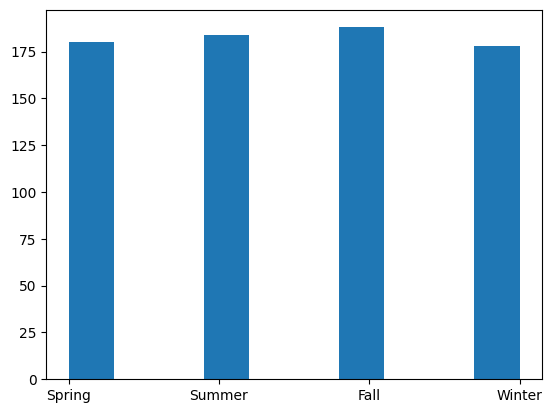

In [31]:
#### Checking for Season Column
plt.hist(boom.season)
plt.show()

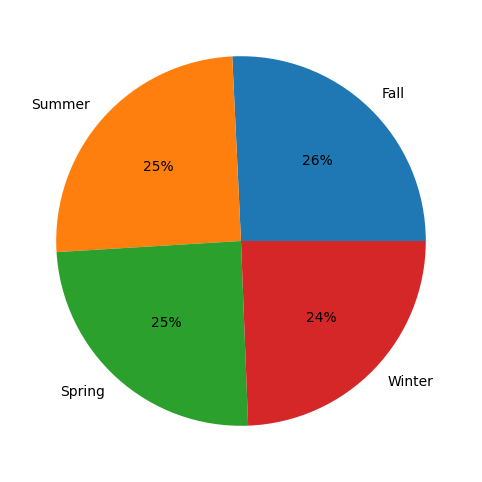

In [32]:
##### Checking with Pie Chart as it is Categorical
plt.figure(figsize = (8,6))
values=boom.season.value_counts(normalize=True).values
index=boom.season.value_counts(normalize=True).index
plt.pie(values,labels=index,autopct='%1.0f%%')
plt.show()

In [33]:
#### From the figure, we understand that almost for all seasons, data is distributed similarly as it is throughout the year
# We will check for all Categorical Data in one figure and check if there is anything unusual.

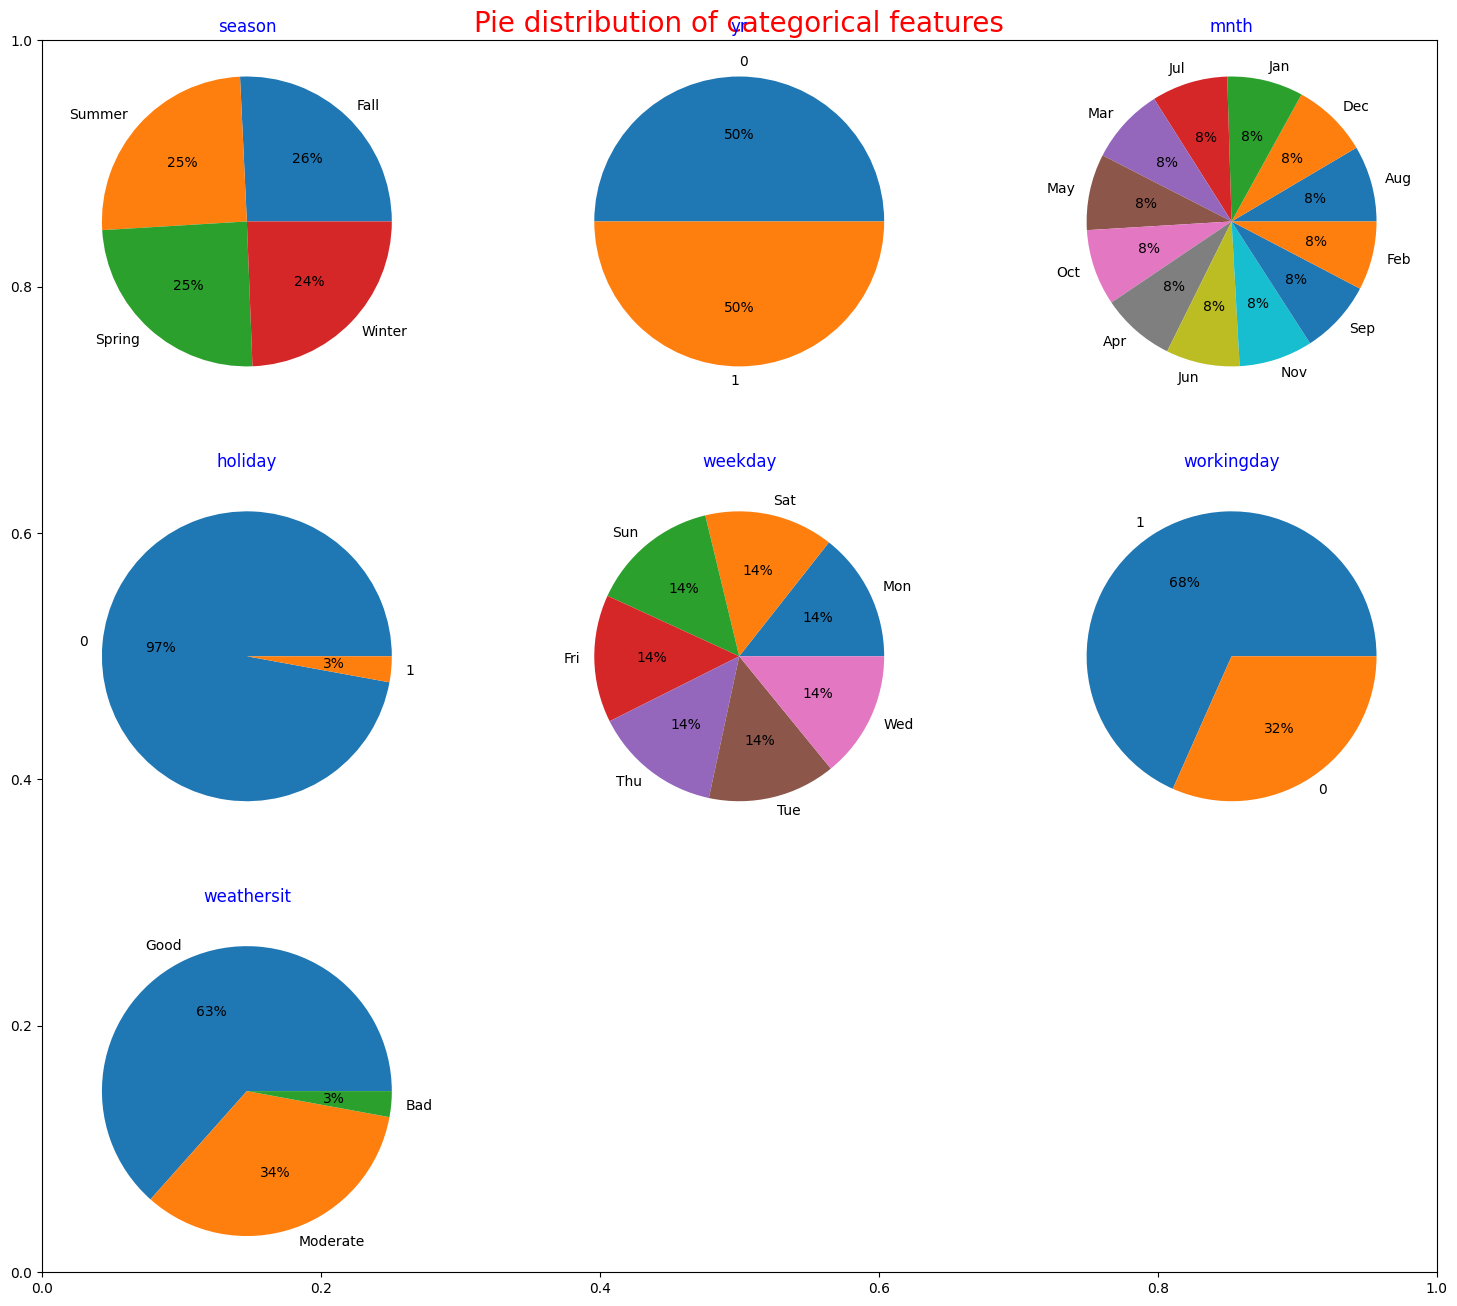

In [34]:
## Plot for all Categorical Variables other than Season
#### We have cat_vars populated with Categorical Variables. We are using that list now for our univariate analysis.
cat_vars=boom.select_dtypes(include='category')

plt.figure(figsize=(18,16))
plt.title('Pie distribution of categorical features',fontsize=20,color='red')

for i in range(1,cat_vars.shape[1]+1): 
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(cat_vars.columns.values[i-1],color='blue')
    values=cat_vars.iloc[:,i-1].value_counts(normalize=True).values
    index=cat_vars.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.0f%%')
plt.show()

In [35]:
#### From the above diagram we understand that few variables are distributed evenly. 
## Yr, Month, Weekday - all are evenly populated records as per calender which is expected. 
## FOr Field weathersit, we have 63 percent for good weather, 34 percent for moderate and only 3 percent for bad weather.And no data exists for very bad weather.
## We have only 3 percent of holidays. 
# We have 68 percent for Weekdays. 

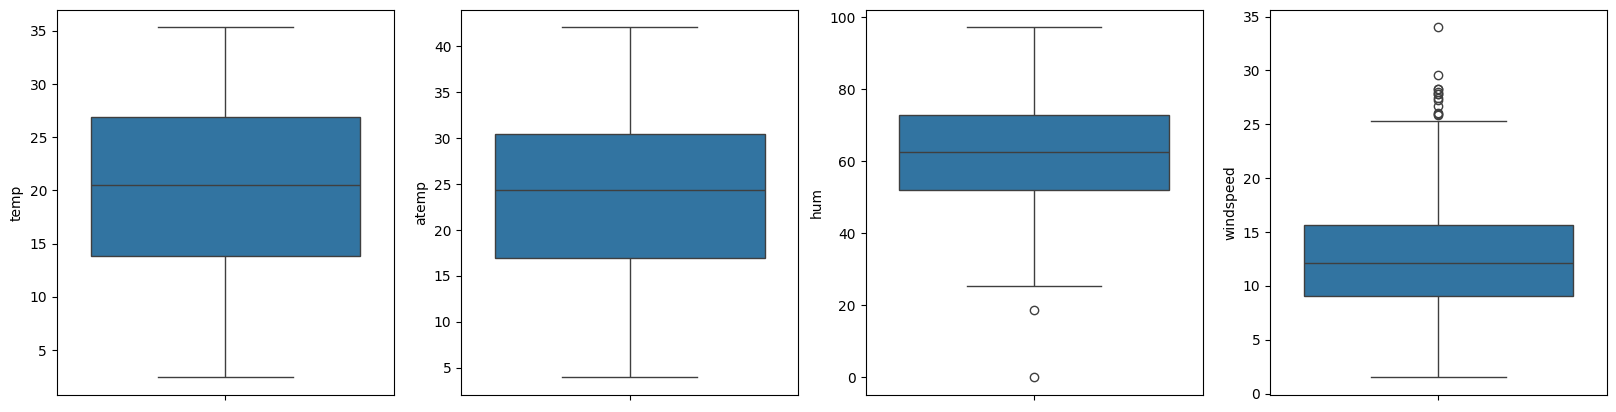

In [36]:
#### Univariate Analysis for Numberical Data 
num_vars = ['temp', 'atemp', 'hum', 'windspeed']   ## Adding all numerical Variables in a list

plt.figure(figsize=(20,5))
i = 1
for col in num_vars:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=boom)
    i+=1

In [37]:
### From the box plots we observe that hum and windspeed have Outliers lying in data. Rest temp and atemp looks good. 
# Checking if Outliers has to be removed from data 

# FOr Outlier checking we need to find Inter Quartile range, then Lower limit range and higher limit range and then get percentile for Outliers. 




In [38]:
def percent_outlier(x):    
    iqr = boom[x].quantile(0.75)-boom[x].quantile(0.25) 
    HR = boom[x].quantile(0.75)+iqr*1.5
    LR = boom[x].quantile(0.25)-iqr*1.5 
    perc_outlier = ((boom[x]<LR).sum()+(boom[x]>HR).sum())/len(boom[x])*100
    perc_outlier = round(perc_outlier,2)
    return(perc_outlier)
print('Percentage of outlier for humidity: ', percent_outlier('hum'))
print('Percentage of outlier for windspeed: ', percent_outlier('windspeed'))

Percentage of outlier for humidity:  0.27
Percentage of outlier for windspeed:  1.78


In [39]:
### Since the Outlier Percentage is very low, we can ignore the outliers and continue Analysis.
# Now we will analyse values of Numerical Columns with Histograms.

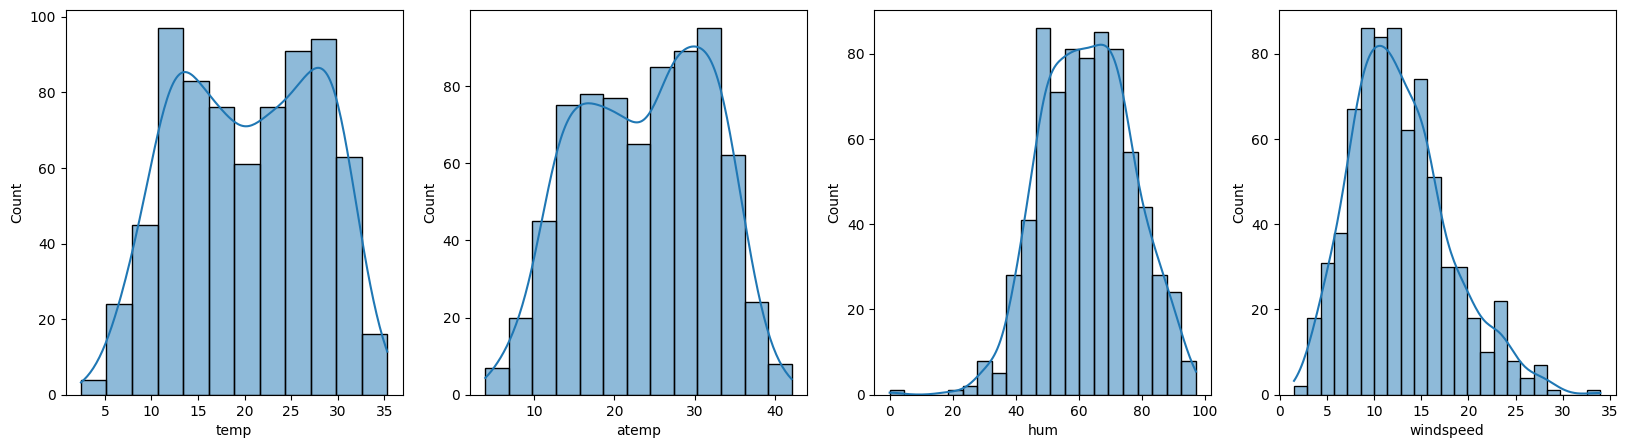

In [40]:
plt.figure(figsize=(20,5))
i = 1
for col in num_vars:
    plt.subplot(1,4,i)
    sns.histplot(x = col, data = boom, kde = True)
    i+=1

In [41]:
#### When checked these Histograms, temp and atemp data is similar with normal distribution of two peaks.
## For hum and windspeed it is normally distributed but skewed to the side 

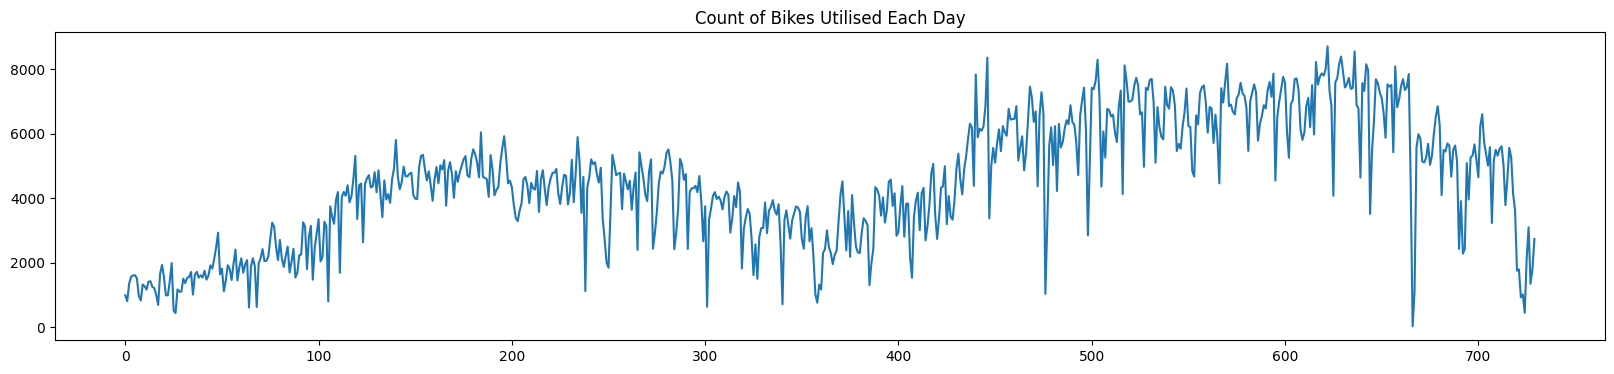

In [42]:
### Our Target Variable is cnt and its a continuous Variable. 
# We need to analyse how cnt is populated for 2 years.
plt.figure(figsize=(20,4))
plt.plot(boom['cnt'])
plt.title("Count of Bikes Utilised Each Day")
plt.show()

In [43]:
### From the plot, we observe that counts increased, then are almost similar, then increased again and then reduced.

In [44]:
##### BIVARIATE ANALYSIS

In [45]:
## Comparing Effect of all other Variables on Cnt Variable (TARGET)
# Preparing a function for drawing Plots with each Categorical Variable for cnt with respect to each year.
def boom_cat(col):
    plt.figure(figsize = (12, 6))
    plt.subplot(1,2,1)
    sns.boxplot(data = boom, x = col, y = 'cnt')
    plt.subplot(1,2,2)
    sns.barplot(x = col, y = 'cnt', hue = 'yr', data = boom, palette = 'Accent')
    plt.show()

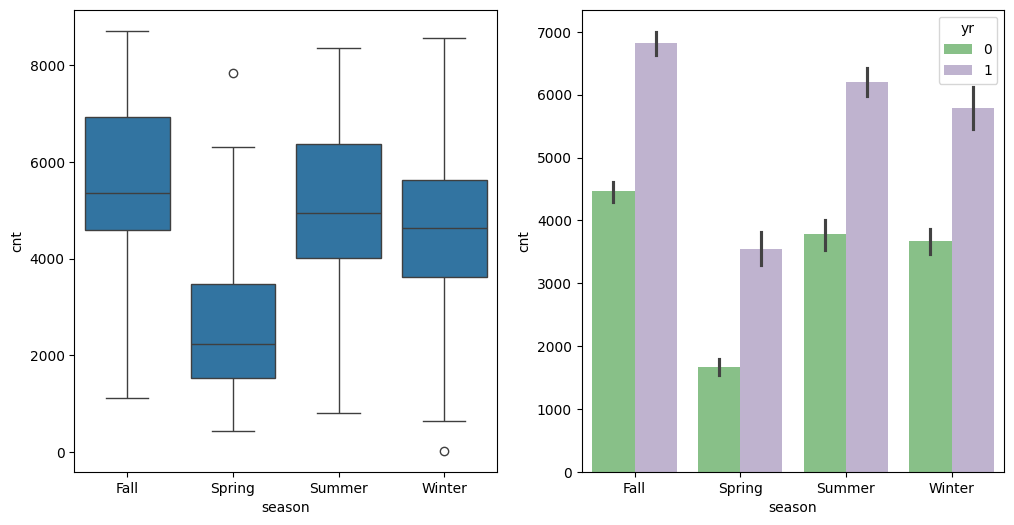

In [46]:
### Analysing field Season with respect to year
boom_cat('season')

In [47]:
### Here we observe that Spring has lesser counts than other three seasons 
## If we observe with respect to year, 201 has more counts than 2018.

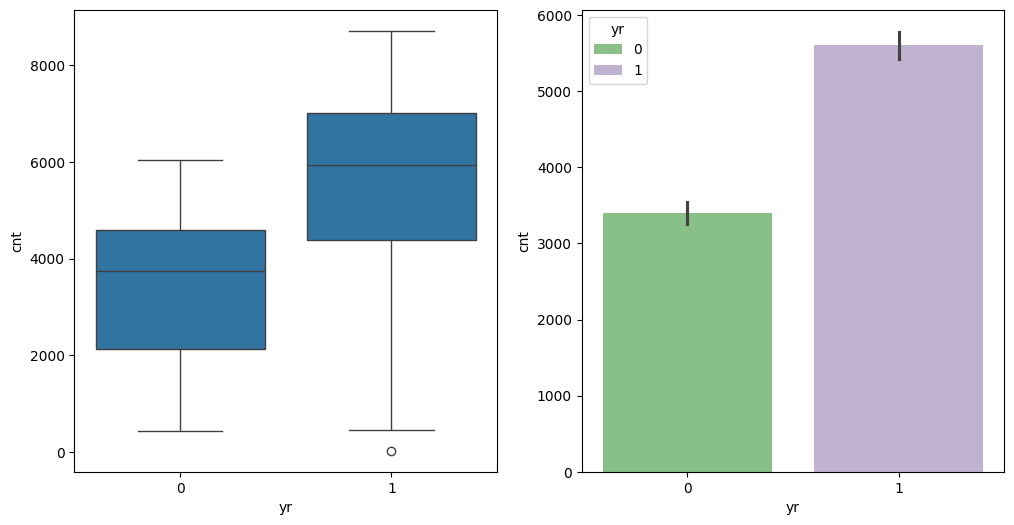

In [48]:
## Analysing Variable year
boom_cat('yr')

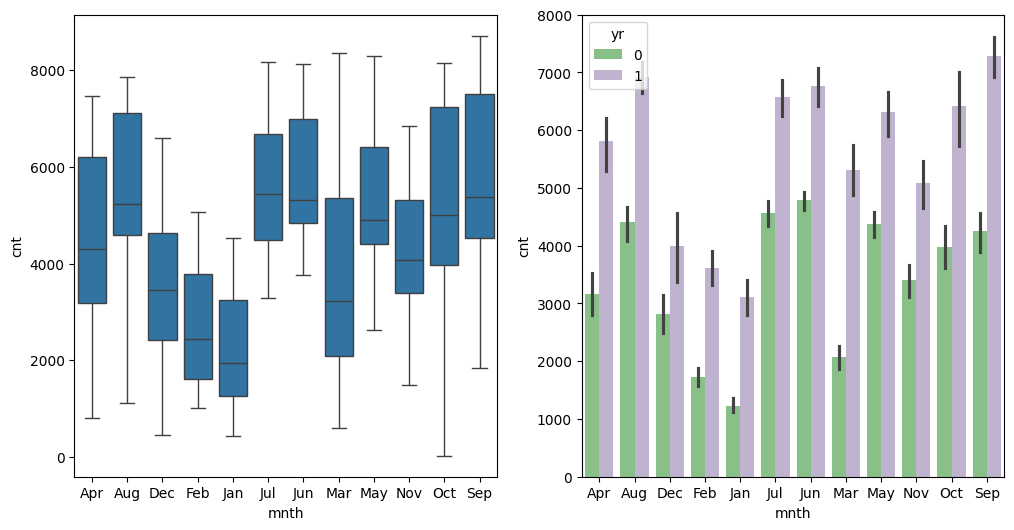

In [49]:
### As seen earlier, year 2019 has improved counts than year 2018
# Analysing Mnth Variable with respect to Yr
boom_cat('mnth')

In [50]:
### From here, we observe that September has most number of counts than other months and January is the least. 
## Here also, 2019 has more counts than 2018.

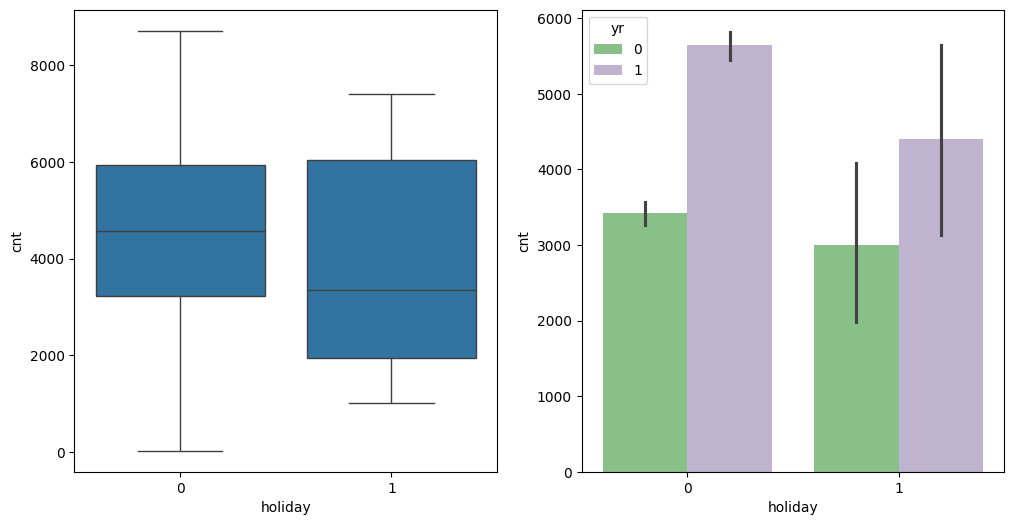

In [51]:
## Analysing Variable Holiday with respect to year
boom_cat('holiday')

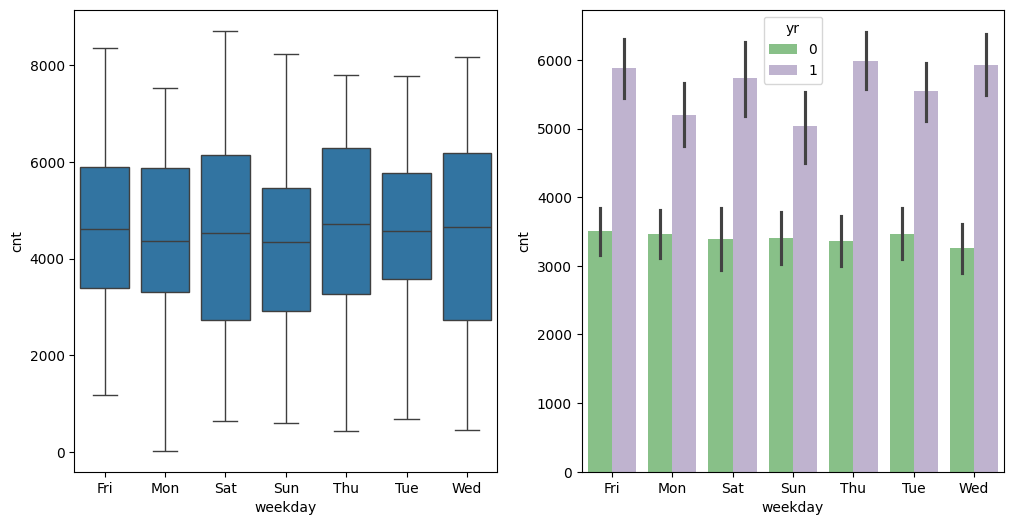

In [52]:
### So, here we confirm that Holidays has less counts than weekdays and highest bookings are in 2019. 
## ANalysing Variable Weekday with respect to Year.
boom_cat('weekday')

In [53]:
### From this, we can observe that there is no much difference between days of week.
# But 2019 have more counts than 2018.

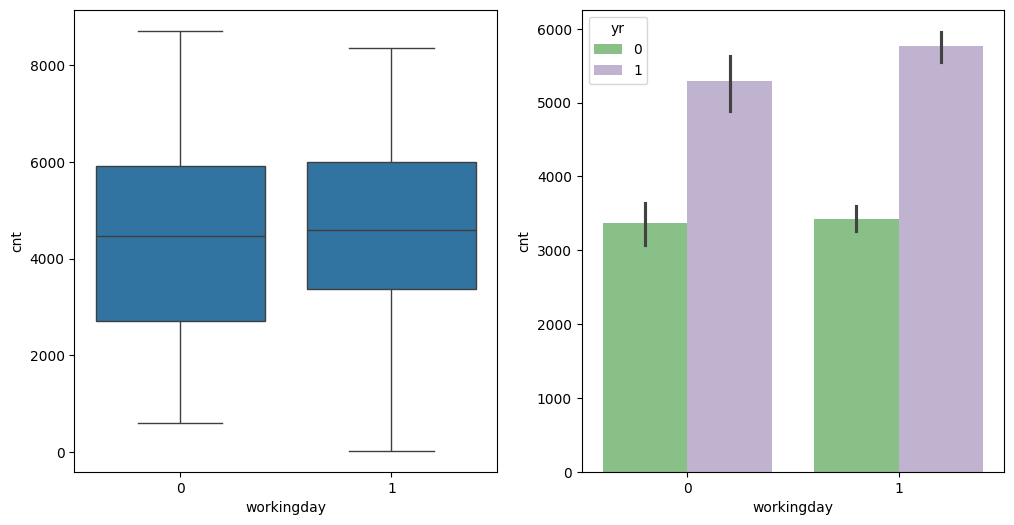

In [54]:
## ANalysing Counts with respect to Workingday
boom_cat('workingday')

In [55]:
### Here, we observe that higher counts are on working days and 2019 have more counts.
## Analysing Cnt with respect to weathersit

In [56]:
### We observe, during good weathersit there are more counts and bad has lesser counts. 
## As usual, 2019 has more counts.

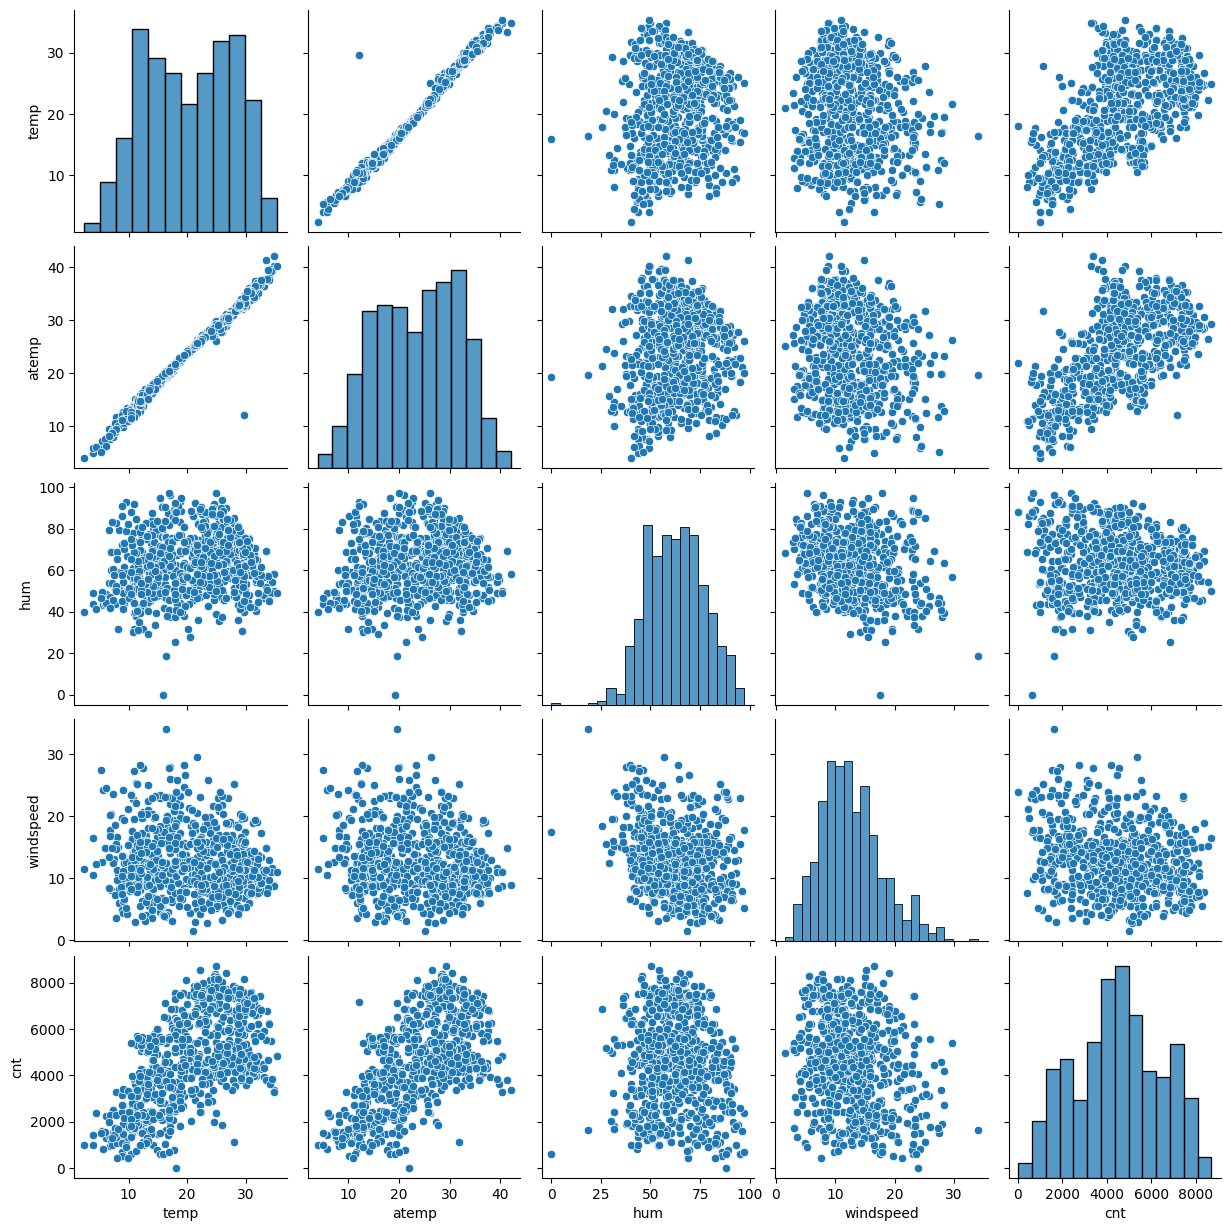

In [57]:
#### We have to analyse all numerical columns.
## Here, we will be using pairplot to understand relation between each numerical column
sns.pairplot(data=boom,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

In [58]:
#### From the plots, we observe temp and cnt are directly proportional in some extent and atemp and cnt in the similar way.
### Temp and atemp are directly proportional to each other which means these 2 variables are highly correlational.
## We can consider preparing a linear regression model as there are few variables showing linear relationship with target variable.

# SO while building model, we may need to consider dropping temp or atemp as they are highly correlational.



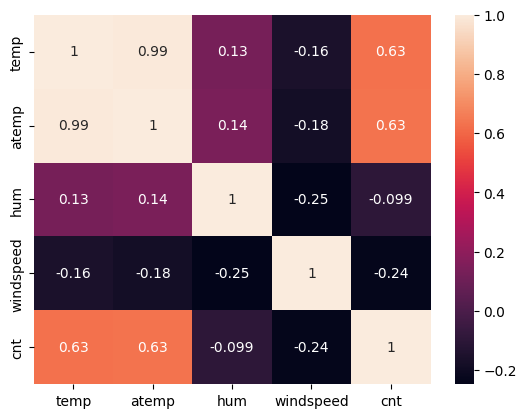

In [59]:
## We can understand correlational details by plotting heat map between these numerical variables. 
sns.heatmap(boom[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

In [60]:
#### From Heatmap, we can infer as below:
### We can observe temp and atemp are correlated to each other with a very high value.
# Also hum and windspeed have negative correlation with cnt variable. 
## And we are ready for building a multiple linear regression model based on results above.

In [61]:
## Model Building

In [62]:
#### Data Preparation for Model Building
## Checking data once
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [63]:
### We have to create dummy variables for Categorical Variables.
## Here we observe yr and workingday have only 2 categories. 
## But for variables season, mnth, weekday and weathersit - we have more than two categories and we need to create dummy variables for these variables.




In [64]:
## Dummy Variable Creation
mnth_dv=pd.get_dummies(boom.mnth,drop_first=True)
weekday_dv=pd.get_dummies(boom.weekday,drop_first=True)
weathersit_dv=pd.get_dummies(boom.weathersit,drop_first=True)
season_dv=pd.get_dummies(boom.season,drop_first=True)

In [65]:
## Checking structure of Dataset after Dummy Variable Creation
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [66]:
### Adding Dummy Variables to dataset
boom = pd.concat([boom,mnth_dv,weekday_dv,weathersit_dv,season_dv],axis=1)

In [67]:
## Checking after dummy Variable addition
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Good,Moderate,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Moderate,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,Spring,0,Jan,0,Sun,0,Moderate,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,...,False,False,False,False,False,True,False,True,False,False
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,...,False,False,False,True,False,True,False,True,False,False
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,...,False,False,False,False,True,True,False,True,False,False


In [68]:
## Dropping Categorical Columns after addition of dummy Variables.
boom.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [69]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   yr          730 non-null    category
 1   holiday     730 non-null    category
 2   workingday  730 non-null    category
 3   temp        730 non-null    float64 
 4   atemp       730 non-null    float64 
 5   hum         730 non-null    float64 
 6   windspeed   730 non-null    float64 
 7   cnt         730 non-null    int64   
 8   Aug         730 non-null    bool    
 9   Dec         730 non-null    bool    
 10  Feb         730 non-null    bool    
 11  Jan         730 non-null    bool    
 12  Jul         730 non-null    bool    
 13  Jun         730 non-null    bool    
 14  Mar         730 non-null    bool    
 15  May         730 non-null    bool    
 16  Nov         730 non-null    bool    
 17  Oct         730 non-null    bool    
 18  Sep         730 non-null    bool    
 19  Mon     

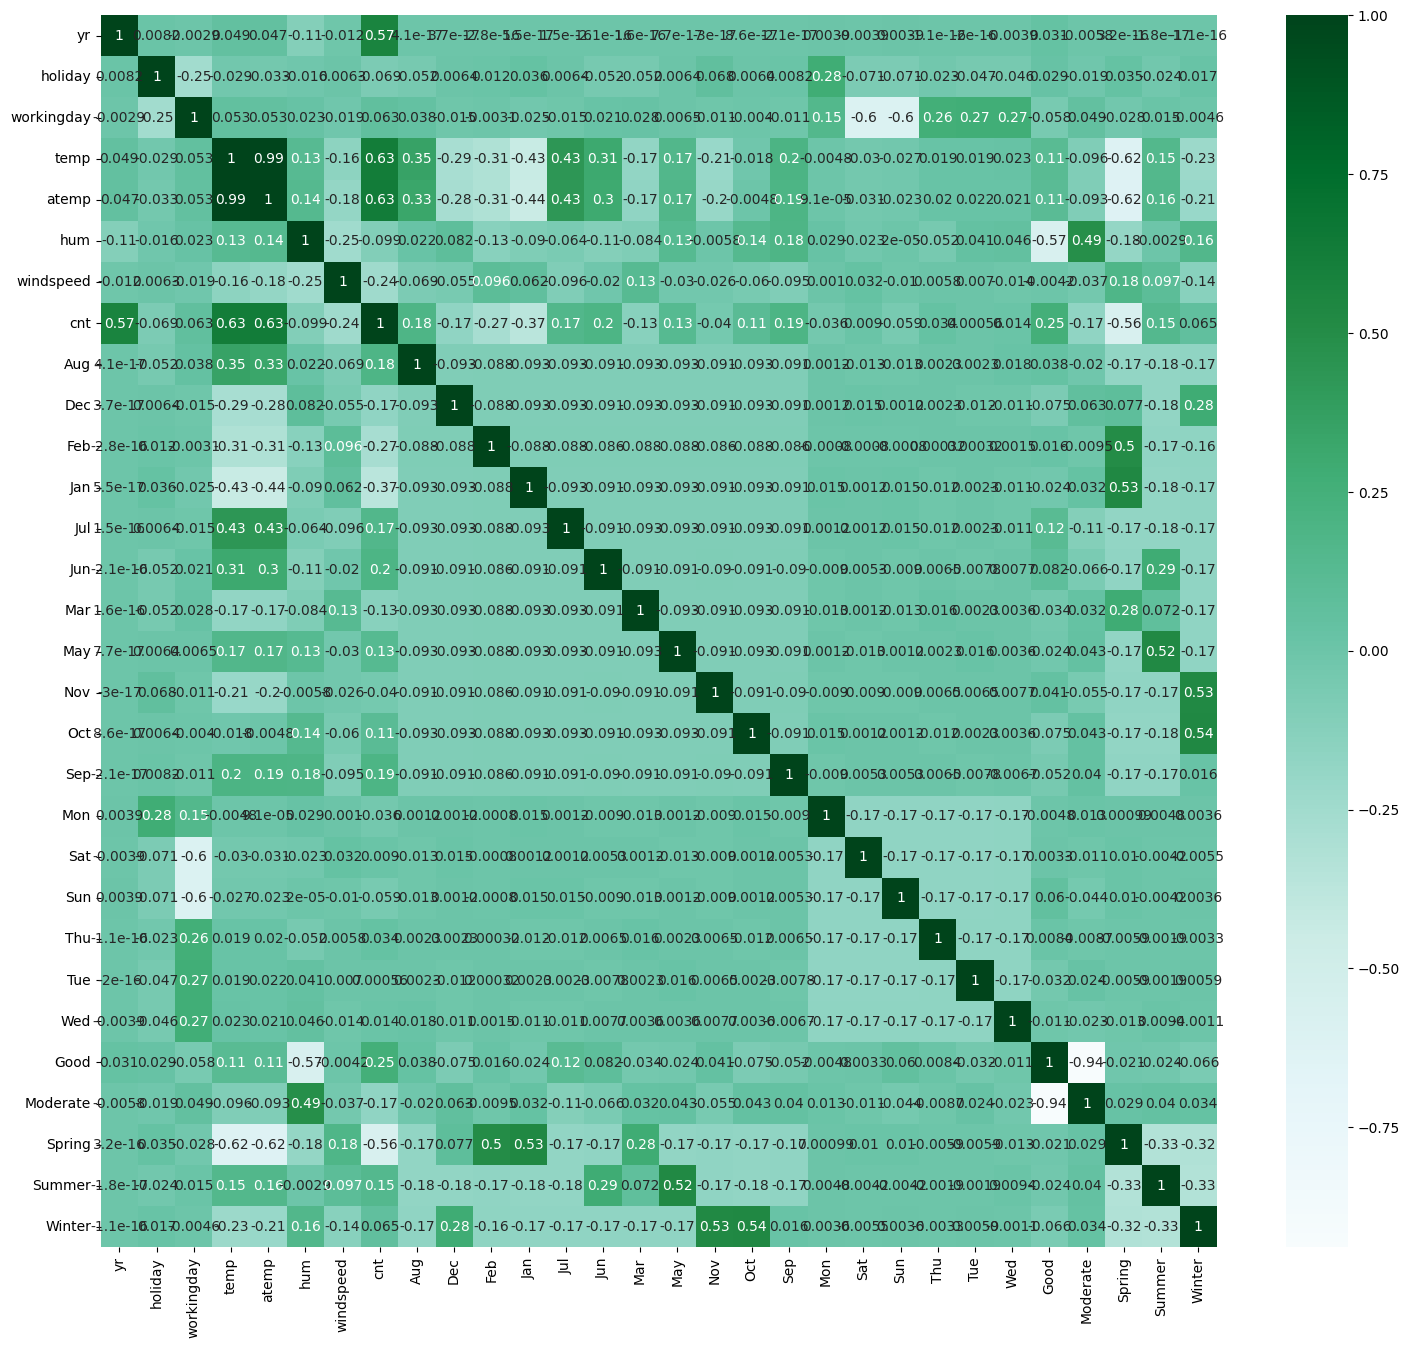

In [70]:
## Plotting Heatmap with All Variables now.
plt.figure(figsize = (18,16))
sns.heatmap(boom.corr(), annot = True, cmap = 'BuGn')
plt.show()

In [71]:
### From the heatmap, we can infer that
# There is more collinearity between few variables. 
# Based on this, while building a model - we have to take into account of this collinearity based on VIF and p-values
# And we will fit a best model as per understanding.

In [72]:
### Data Splitting 
# We have to split data into train set and test set. 
### Checking count of dataset before splitting
boom.shape

(730, 30)

In [73]:
## SPlitting data into X and y variables before splitting.
y=boom.pop('cnt')
X = boom


In [74]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [75]:
## Checking shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 29)
(219, 29)
(511,)
(219,)


In [76]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Good', 'Moderate',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

In [77]:
### We have columns with Numerical data and it is good to have scaling for these columns to understand better.
## Most common method we use for Scaling is MinMaxScaler.

In [78]:
## Variables for which Scaling needs to be done.
Num_Var = X_train[['temp','atemp','hum','windspeed']]


In [79]:
scaler = MinMaxScaler()

scaler.fit(X_train[['temp','atemp','hum','windspeed']])

MinMaxScaler()

In [80]:
X_train_scaled = scaler.transform(X_train[['temp','atemp','hum','windspeed']])

In [81]:
X_train[['temp','atemp','hum','windspeed']] = X_train_scaled

In [82]:
X_train.describe()

,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000
mean,0.537386,0.513133,0.650333,0.320844
std,0.225640,0.212202,0.145741,0.169639
min,0.000000,0.000000,0.000000,0.000000
25%,0.341151,0.332910,0.538858,0.199179
50%,0.542077,0.529300,0.653499,0.298098
75%,0.735215,0.688457,0.754401,0.414438
max,1.000000,1.000000,1.000000,1.000000


In [83]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Good,Moderate,Spring,Summer,Winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,False,False,False,...,False,False,False,True,False,True,False,False,False,True
576,1,0,1,0.815169,0.766351,0.725633,0.264686,False,False,False,...,False,False,False,True,False,True,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,False,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,False,True,False,...,False,True,False,False,False,True,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [84]:
### NOw that data is ready, we can build model
## We can use both Automated and Manual approach

In [85]:
### RFE - Automated Approach
# We have a total of 29 columns , we can bring down columns to 15 using RFE


In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
rfe = RFE(estimator = lr, n_features_to_select = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [88]:
### View Columns Selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Good', True, 1),
 ('Moderate', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [89]:
### View columns selected by RFE and removing other columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'Sat', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [90]:
## View features not selected by RFE 
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [91]:
### Preparing data set only with the columns suggested by RFE
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'Sat', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']]
X_train_rfe.shape

(511, 15)

In [92]:
## Creating Functions for Model and to calculate VIF as we use it multiple Times.
def build_model(cols):
    # Add a constant
    X_train_sm = sm.add_constant(X_train[cols].astype(float))
    
    # Create a first fitted model
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    # Check the parameters obtained
    # print(lm.params)
    print(lm.summary())
    return lm

In [93]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calculated as a parameter
def get_vif(cols):
    df1 = X_train[cols].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [94]:
### Now for automated model, we will include all columns suggested by RFE and build a model
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Dec',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.19e-189
Time:                        20:39:26   Log-Likelihood:                -4119.3
No. Observations:                 511   AIC:                             8271.
Df Residuals:                     495   BIC:                             8338.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        343.4193    407.829      0.842      0.4

In [95]:
### Here when we check, atemp has higher p-value and VIF.
## We will remove this column and check the build of model again.
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.38e-191
Time:                        20:39:27   Log-Likelihood:                -4119.3
No. Observations:                 511   AIC:                             8269.
Df Residuals:                     496   BIC:                             8332.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        342.3768    406.668      0.842      0.4

In [96]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.38e-191
Time:                        20:39:29   Log-Likelihood:                -4119.3
No. Observations:                 511   AIC:                             8269.
Df Residuals:                     496   BIC:                             8332.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        342.3768    406.668      0.842      0.4

In [97]:
### Now we can see that Dec has high P-value 
# Remove dec field and creating model
cols = ['yr', 'holiday', 'temp','hum', 'windspeed',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.46e-191
Time:                        20:39:30   Log-Likelihood:                -4120.8
No. Observations:                 511   AIC:                             8270.
Df Residuals:                     497   BIC:                             8329.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        288.3178    406.242      0.710      0.4

In [98]:
#### Now, we have hum column with high VIF. 
## We will remove this column and create new model

In [99]:
cols = ['yr', 'holiday', 'temp','windspeed',
       'Nov', 'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.93e-189
Time:                        20:39:32   Log-Likelihood:                -4129.7
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     498   BIC:                             8341.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -758.8783    325.691     -2.330      0.0

In [100]:
#### We see Nov has high p-value 
## We will remove this column and build model

In [101]:
cols = ['yr', 'holiday', 'temp','windspeed',
       'Sep', 'Sun', 'Good', 'Moderate', 'Spring', 'Summer', 'Winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.19e-189
Time:                        20:39:35   Log-Likelihood:                -4130.5
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     499   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -791.7120    324.737     -2.438      0.0

In [102]:
#### Column Good has more VIF. Hence we will remove Good COlumn.
cols = ['yr', 'holiday', 'temp','windspeed',
       'Sep', 'Sun','Moderate', 'Spring', 'Summer', 'Winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     191.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.31e-164
Time:                        20:39:37   Log-Likelihood:                -4193.9
No. Observations:                 511   AIC:                             8410.
Df Residuals:                     500   BIC:                             8456.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1615.8321    286.700      5.636      0.0

In [103]:
## Here Spring has more p-value, dropping that column
cols = ['yr', 'holiday', 'temp','windspeed',
       'Sep', 'Sun', 'Moderate', 'Summer', 'Winter']

build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.51e-164
Time:                        20:39:39   Log-Likelihood:                -4196.0
No. Observations:                 511   AIC:                             8412.
Df Residuals:                     501   BIC:                             8454.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1146.7007    162.946      7.037      0.0

In [104]:
#### Now all p-values are less and VIF values are less than 5.
## So now, this is good fit model which will help us analyse counts 
## Here prob(F-statistic) is also very low.which indicates good.
# We have R - squared as 0.792
# Adjusted R - squared as 0.788
### All parameters indicate that we are on good path.

In [105]:
### We will build model using sklearn with same variables and get the results.
def build_model_sk(X,y):
    lr_sk = LinearRegression()
    lr_sk.fit(X,y)
    return lr_sk

In [106]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'holiday', 'temp','windspeed',
       'Sep', 'Sun', 'Moderate', 'Summer', 'Winter']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1146.7007403695288 [ 2078.04026643  -799.9942024   4773.42359258 -1581.19119968
   773.06346824  -375.86981884  -584.38279938   763.63180616
  1023.73884582]


In [107]:
#### From the model above, we get below constant and coefficient details.
## Constant - 1146.7
## yr - 2078.04
## holiday - -799.994
## temp - 4773.4236
## windspeed - -1581.19
## Sep - 773.06
## Sun - -375.87
## Moderate - -584.38
## Summer - 763.63
## Winter - 1023.74

In [108]:
##### From the above details we can infer as below:
# High positive coefficient of year suggests that 2019 has better counts than 2018
# High negative coefficient of holiday suggests there are lesser counts on holidays.
# High positive coefficient of temp suggests if temperature is more, there will be more counts.
# If windspeed is more, lesser counts.
# There are more counts in summer and winter as the coefficient is positive.

In [109]:
##### Hypothesis Testing

In [110]:
### For hypothesis testing, we details like 
## H0 : All coefficients are equal to 0.
## H1 : All coefficients are not equal to 0.


In [111]:
## From above model, we can say that all coefficients are not equal to zero.And hence null hypothesis is rejected.

In [112]:
## MODEL EVALUATION

In [113]:
### Residual Analysis
# For a good model, if we plot residuals they have to follow normal distribution


In [114]:
## Finding Residuals
y_train_pred = lr.predict(X_train[cols])
res = y_train_pred - y_train
res

653   -1327.227996
576    -518.632603
426     282.342268
728    1174.344459
482     774.657352
          ...     
578    -208.056057
53       20.772625
350    -650.884997
79      619.596710
520   -1300.476719
Name: cnt, Length: 511, dtype: float64

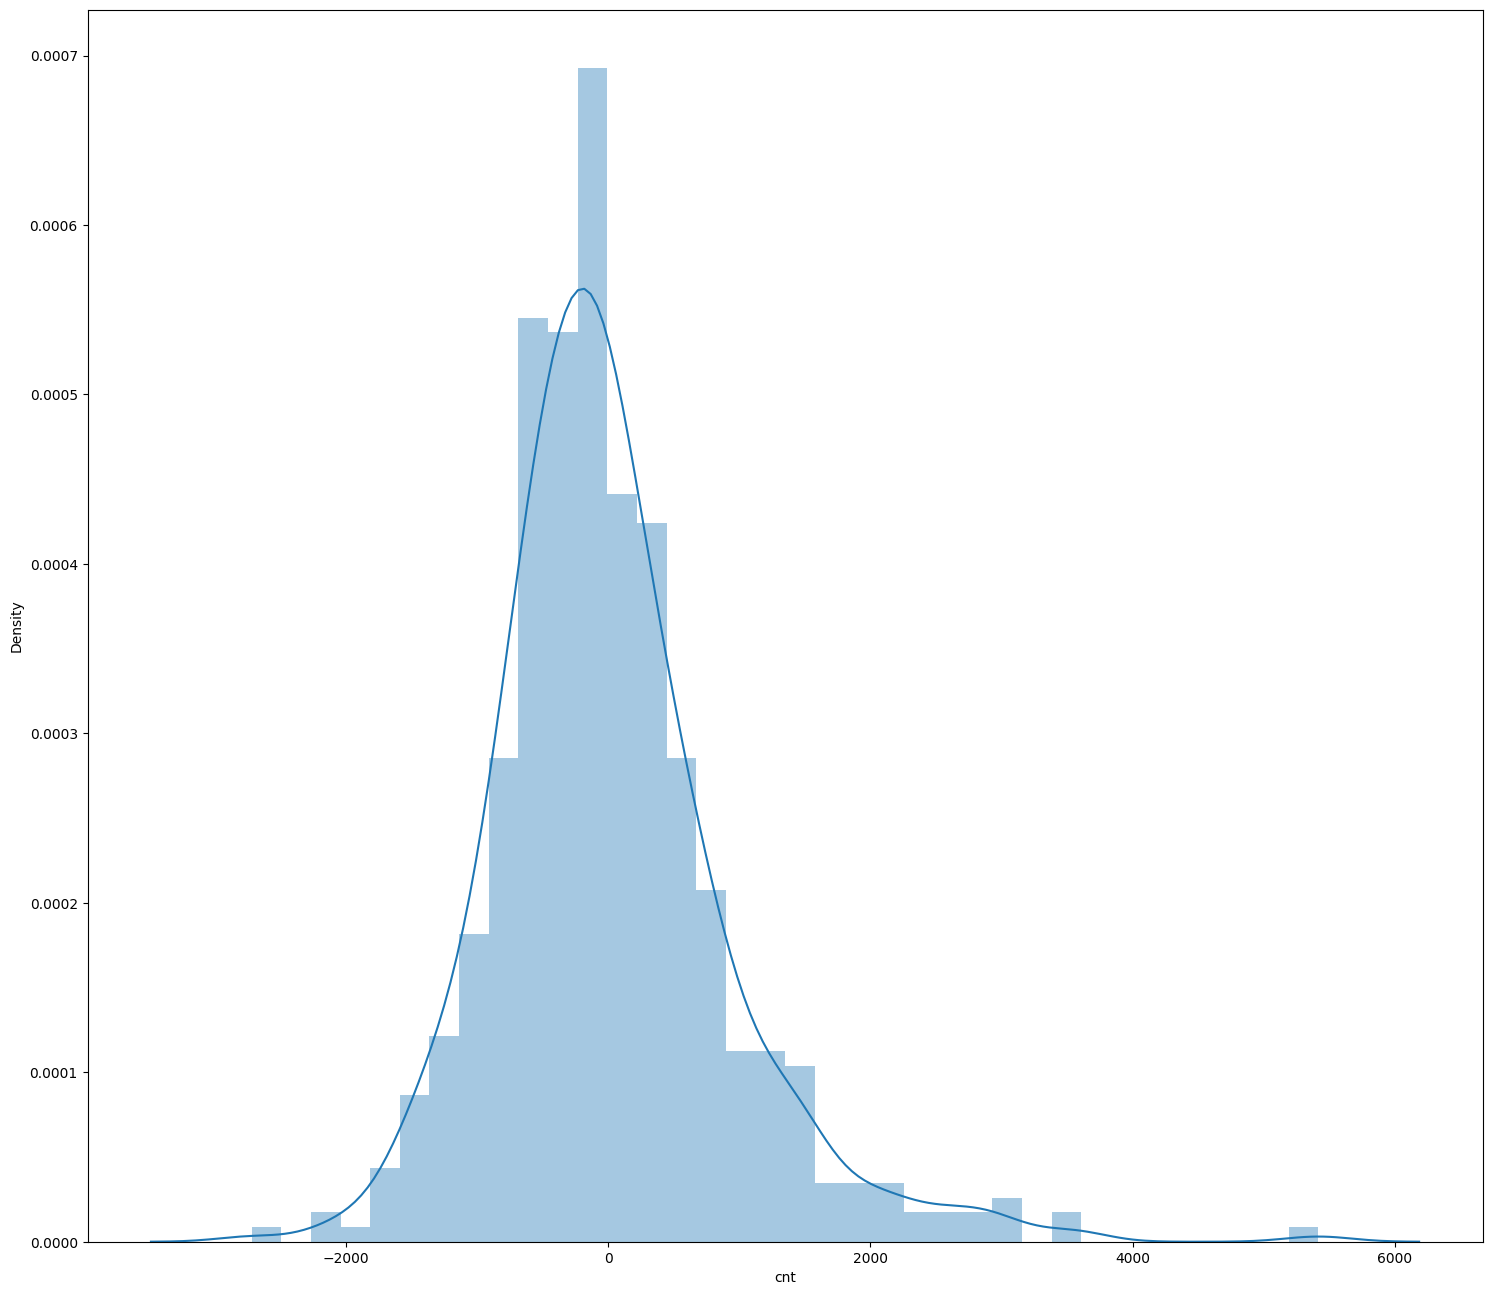

In [115]:
plt.figure(figsize = (18,16))
sns.distplot(res)
plt.show()

In [116]:
## We can observe here that errors are normally distributed with mean around zero. 
## Now we can compare in plot actual and predicted y values.

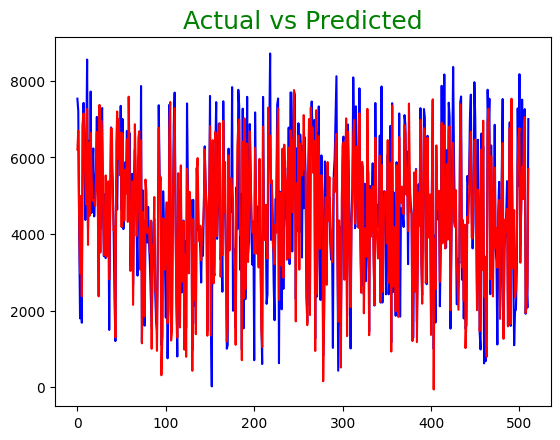

In [117]:
#Actual vs Predicted
data_points = [i for i in range(0,len(X_train),1)]
plt.plot(data_points,y_train, color="blue")
plt.plot(data_points,y_train_pred, color="red")
plt.title('Actual vs Predicted', fontsize = 18, color='green')
plt.show()

In [118]:
### Here we can observe that actual and predicted values are almost similar.


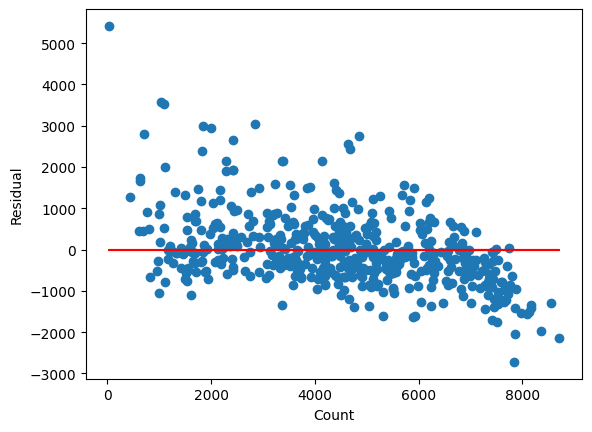

In [119]:
## Check for Homoscedasticity
plt.scatter(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [120]:
### Here we observe that there is no particular pattern for residuals.


In [121]:
#### Now we can go for prediction of Test data with the above model
#Scale variables in X_test as we did for x_train
boom_numvars = ['temp', 'atemp', 'hum', 'windspeed']

#We only transform test data, no fitting on test data
X_test[boom_numvars] = scaler.transform(X_test[boom_numvars])

In [122]:
#Columns from our final model
cols = ['yr', 'holiday', 'temp','windspeed',
       'Sep', 'Sun', 'Moderate', 'Summer', 'Winter']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [123]:
## Predict R2 value for test data
r2_score(y_test,y_test_pred)

0.7698583154504814

In [124]:
## R2 for trained data - 0.79
## R2 for test data - 0.769
### Both the values are pretty closer. SO model works fine.

Text(0, 0.5, 'y_test_pred')

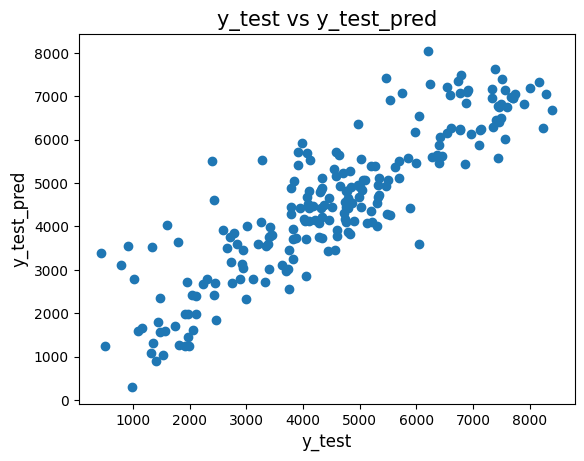

In [125]:
#Plot actual y-test values and y-test-predicted values
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize = 15)              
plt.xlabel('y_test', fontsize = 12)                        
plt.ylabel('y_test_pred', fontsize = 12)

In [126]:
def plot_actual_pred(actual,pred,scale,dataname):
    data_pnts = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(data_pnts,actual, color="blue")
    plt.plot(data_pnts,pred, color="red")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              

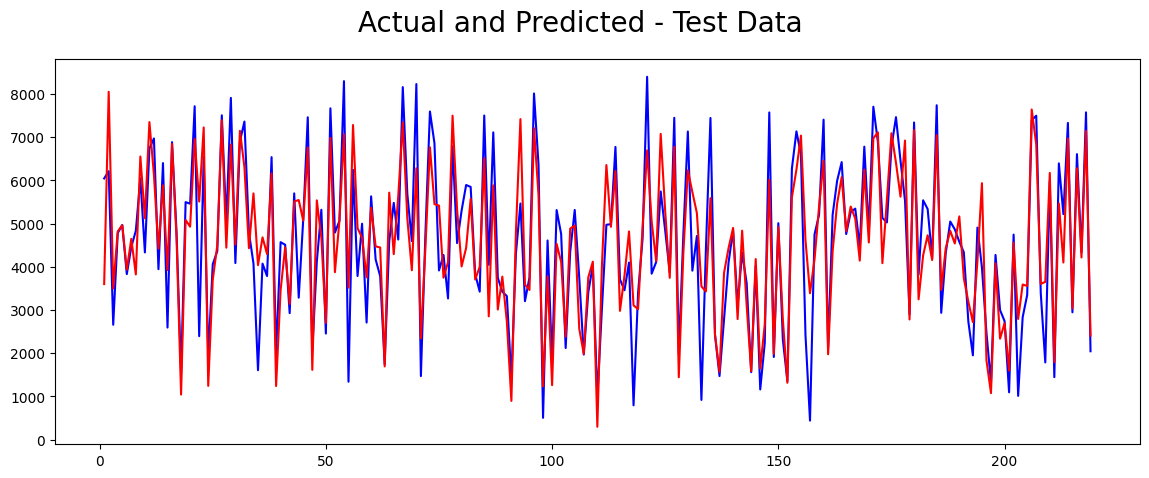

In [127]:
plot_actual_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

In [128]:
### From the plot above, we can say that actual and predicted values are similar for this model.